## Final Project Submission

Please fill out:
e:
Student pacFull-timeime
Scheduled project review date/t 2/02/2023ime:
Instructor name:
Blog pos https://github.com/mbuvenzuve/phase2groupprojectt URL:

## Student names: 

* Kevin Riungu 
* Donnah Mwaniki
* Hanan Maalim 
* Winnie Nzuve 
* Mike Kiptoch
* Daniel Muruthi
* Beatrice Adhiambo
* Brian Gikonyo 

## Business Understanding 

## Problem Statement


## Data Understanding

In [2]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import kstest


In [3]:
#loading dataset for laptoprices.
laptopprice= pd.read_csv("laptop_data_cleaned.csv")
laptopprice.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [4]:
laptopprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [5]:
laptopprice.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


## Data Cleaning 

In [6]:
laptopprice.duplicated().sum()

1

In [7]:
laptopprice.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [8]:
laptopprice.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [9]:
import statsmodels.api as sm

X = laptopprice['Weight']
y = laptopprice['Price']  

# Add a constant term to the independent variable
k = sm.add_constant(X)

# Create and fit the model
model = sm.OLS(y, k).fit()

# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     29.81
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           5.72e-08
Time:                        15:36:55   Log-Likelihood:                -1181.6
No. Observations:                1273   AIC:                             2367.
Df Residuals:                    1271   BIC:                             2378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5422      0.055    191.210      0.0

**Coefficients**
const (Intercept): The intercept of the regression line. In this case, it is 10.5422. This is the estimated value of Price when Weight is 0.*
Wei**
t: The coefficient for Weight is 0.1401. This means that for every one-unit increase in Weight, the model predicts an increase in Price by 0.1401 units**.

Mode** Fit:
R-squared: R-squared is a measure of how well the independent variable (Weight) explains the variability of the dependent variable (Price). A value of 0.023 indicates that only 2.3% of the variance in Price is explained by Wei**ght.

Adjusted R**
quared: Adjusted R-squared adjusts the R-squared value based on the number of predictors in the model. It's useful in assessing the model fit, especially when adding more predictors. Here, it'

**0.022.

Statistical Si**nificance:
t-statistic and P>|t|: The t-statistic is a measure of how many standard errors the coefficient is away from 0. The associated p-value (P>|t|) is the probability of observing a t-statistic as extreme as the one computed from the data, assuming the null hypothesis that the coefficient is equal to 0. In this case, both const and Weight have extremely low p-values (close to 0), indicating that they are statistically significant.ignificant.

In [10]:
# Specify the columns you're interested in
selected_columns = ['Ram', 'Price', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']

# Calculate the correlation for the selected columns
correlation_matrix_selected = laptopprice[selected_columns].corrwith(laptopprice['Price'])

# Display the correlation values for the selected columns
print(correlation_matrix_selected)


Ram            0.680519
Price          1.000000
Weight         0.151386
TouchScreen    0.194289
Ips            0.279240
Ppi            0.480687
HDD           -0.097361
SSD            0.658808
dtype: float64


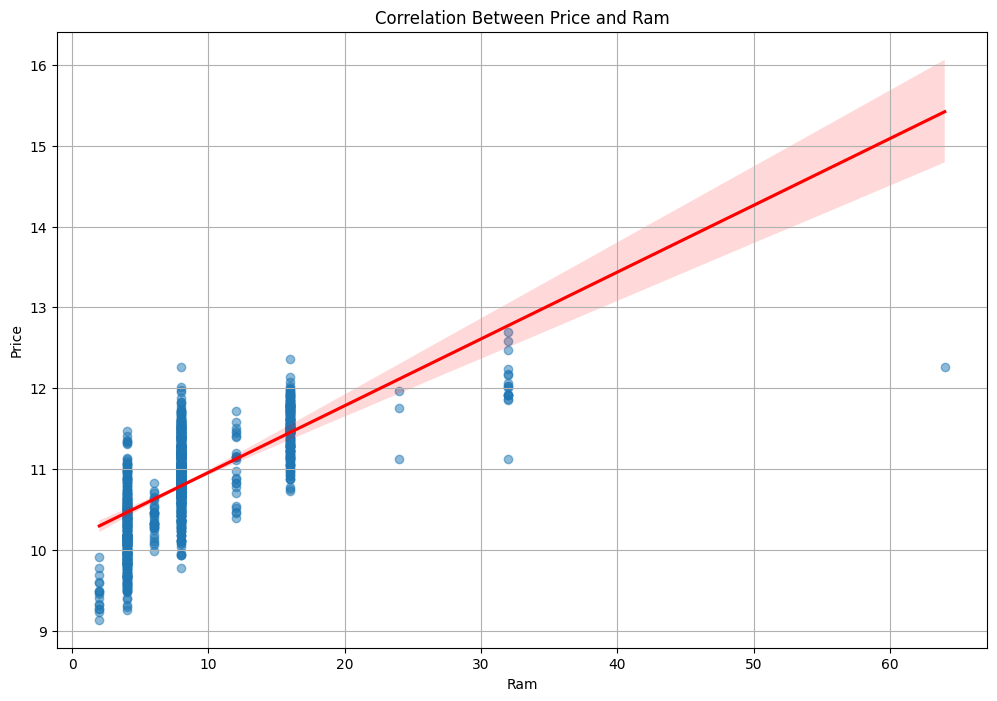

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming laptopprice is your DataFrame
plt.figure(figsize=(12, 8))

# Scatter plot with regression line
sns.regplot(x='Ram', y='Price', data=laptopprice, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

# Additional details
plt.title('Correlation Between Price and Ram')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [12]:
laptopprice = pd.get_dummies(laptopprice, columns=['Company'], prefix='Company')          

In [13]:
laptoppricerecorded = laptopprice.drop('Company_MSI', axis= 1)
laptoppricerecorded

,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,...,Company_Huawei,Company_LG,Company_Lenovo,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,...,False,False,False,False,False,False,False,False,False,False
1,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,...,False,False,False,False,False,False,False,False,False,False
2,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,...,False,False,False,False,False,False,False,False,False,False
3,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,...,False,False,False,False,False,False,False,False,False,False
4,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,...,False,False,False,False,False,False,False,False,False,False
1269,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,...,False,False,True,False,False,False,False,False,False,False
1270,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,...,False,False,True,False,False,False,False,False,False,False
1271,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,...,False,False,True,False,False,False,False,False,False,False


In [14]:
print(laptopprice.columns)

Index(['TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi',
       'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os', 'Company_Acer',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi'],
      dtype='object')


In [15]:
company_columns = ['Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
                   'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
                   'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
                   'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
                   'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi']

laptopprice[company_columns] = laptopprice[company_columns].astype(int)

# Display the modified DataFrame
laptopprice.head()


,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,...,0,0,0,0,0,0,0,0,0,0
1,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,...,0,0,0,0,0,0,0,0,0,0
3,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,...,0,0,0,0,0,0,0,0,0,0
4,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,...,0,0,0,0,0,0,0,0,0,0


In [16]:
laptoppricerecorded = laptopprice.drop('Company_MSI', axis= 1)
laptoppricerecorded

,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,...,Company_Huawei,Company_LG,Company_Lenovo,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,...,0,0,0,0,0,0,0,0,0,0
1,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,...,0,0,0,0,0,0,0,0,0,0
3,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,...,0,0,0,0,0,0,0,0,0,0
4,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,...,0,0,0,0,0,0,0,0,0,0
1269,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,...,0,0,1,0,0,0,0,0,0,0
1270,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,...,0,0,1,0,0,0,0,0,0,0
1271,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the laptopprices DataFrame
X = laptopprice[['Ram', 'Weight', 'Ips', 'Ppi', 'SSD']]
y = laptopprice['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.1428518500842123
R-squared: 0.6393756018045242


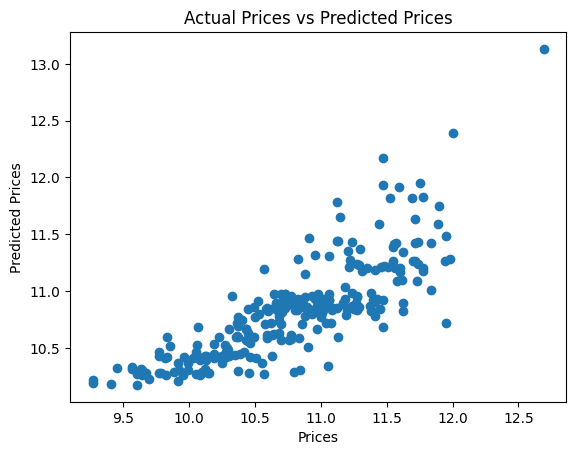

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


In [24]:
# Specify the columns you're interested in
selected_columns = ['Ram', 'Price', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD','Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
                   'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
                   'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
                   'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
                   'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi']

# Calculate the correlation for the selected columns
correlation_matrix_selected = laptopprice[selected_columns].corrwith(laptopprice['Price'])

# Display the correlation values for the selected columns
print(correlation_matrix_selected)

Ram                  0.680519
Price                1.000000
Weight               0.151386
TouchScreen          0.194289
Ips                  0.279240
Ppi                  0.480687
HDD                 -0.097361
SSD                  0.658808
Company_Acer        -0.249514
Company_Apple        0.093356
Company_Asus        -0.018449
Company_Chuwi       -0.089796
Company_Dell         0.084610
Company_Fujitsu     -0.020767
Company_Google       0.042908
Company_HP          -0.019252
Company_Huawei       0.026080
Company_LG           0.062273
Company_Lenovo      -0.042994
Company_MSI          0.188654
Company_Mediacom    -0.142000
Company_Microsoft    0.052978
Company_Razer        0.133549
Company_Samsung      0.044365
Company_Toshiba      0.069182
Company_Vero        -0.133899
Company_Xiaomi       0.015207
dtype: float64
